# Problem

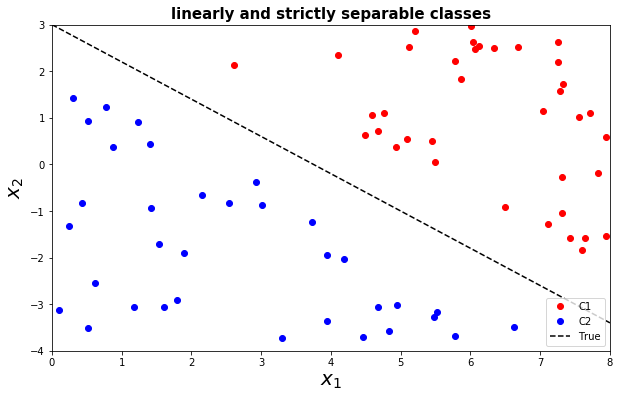

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = 8*np.random.rand(100, 1)
x2 = 7*np.random.rand(100, 1) - 4

g0 = 0.8*x1 + x2 - 3
g1 = g0 - 1
g2 = g0 + 1

C1 = np.where(g1 >= 0)[0]
C2 = np.where(g2 < 0)[0]

xp = np.linspace(0,8,100).reshape(-1,1)
ypt = -0.8*xp + 3

plt.figure(figsize=(10, 6))
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.plot(xp, ypt, '--k', label='True')
plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

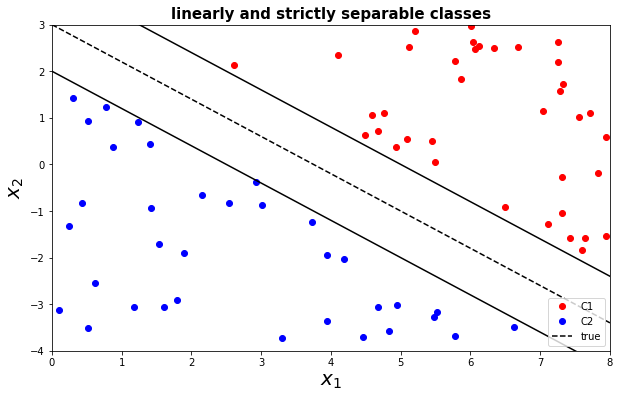

In [3]:
xp = np.linspace(0,8,100).reshape(-1,1)
ypt = -0.8*xp + 3

plt.figure(figsize=(10, 6))
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.plot(xp, ypt, '--k', label='true')
plt.plot(xp, ypt-1, '-k')
plt.plot(xp, ypt+1, '-k')
plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

In [4]:
import cvxpy as cvx

# CVXPY Examples

```
w = cvx.Variable([shape])

loss = cvx.sum_squares(something)
loss = cvx.norm(something)
loss = cvx.abs(something)

obj = cvx.Minimize(loss)
obj = cvx.Maximize(-loss)

constraints = [X1>1, X1*W + b < -1, something]

prob = cvx.Problem(obj, constraints).solve()
```

```
w.value
```

In [45]:
N = C1.shape[0]
M = C2.shape[0]

X1 = np.hstack([x1[C1], x2[C1]])
X2 = np.hstack([x1[C2], x2[C2]])

one1 = np.ones([N, 1])
one2 = np.ones([M, 1])

X1 = np.hstack([X1, one1])
X2 = np.hstack([X2, one2])

X1 = np.matrix(X1)
X2 = np.matrix(X2)

w = cvx.Variable([3, 1])
# n = cvx.Variable([N, 1])
# m = cvx.Variable([M, 1])

loss = cvx.norm(w)
# loss = cvx.norm(w) + cvx.norm(n) + cvx.norm(m)

obj = cvx.Minimize(loss)

constraints = [X1*w >= 1, X2*w <= -1]
# constraints = [X1*w >= (1-n), X2*w <= -(1-m), n>=0, m>=0]

prob = cvx.Problem(obj, constraints).solve()

In [40]:
w = w.value

In [41]:
w[1,0]

0.8091109682645061

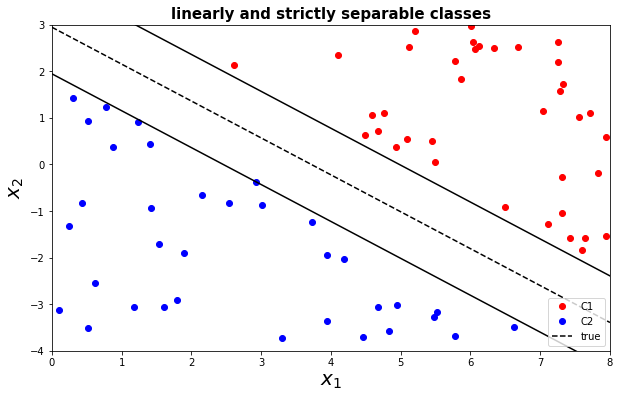

In [42]:
xp = np.linspace(0,8,100).reshape(-1,1)
ypt = -w[0,0]/w[1,0]*xp -w[2,0]/w[1,0]

plt.figure(figsize=(10, 6))
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.plot(xp, ypt, '--k', label='true')
plt.plot(xp, ypt-1, '-k')
plt.plot(xp, ypt+1, '-k')
plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()